# Basic ML Libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import copy

# Dataset
<h4>Data is taken from sklearn.datasets, the data is classification of images to recognize which digit from <i>(0 - 9)</i> is present in the image. </h4>

<h4> The image is a <i> 8 x 8 </i> pixels taken as a vector with 64 features. The class are from <i> (0 - 9).</i> Total samples 1797 </h4>

In [39]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

In [40]:
data, labels = digits.data, digits.target

In [41]:
print(data.shape, labels.shape)

(1797, 64) (1797,)


In [42]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, stratify = labels, random_state = 0, test_size = 0.2)
print(x_train.shape, y_train.shape)

(1437, 64) (1437,)


# Model

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn import tree

## Criterion (Entropy)

<h4> Creating various models depending on the depth going from <i> (1 - 20) </i> and picking the best model depending on the accuracy and loss, with criteria of splitting fixed to <i><b> Entropy.</b></i> </h4>

In [44]:
loss = []
accuracy = []
best_depth, best_model, best_accuracy = None, None, 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = depth, max_features = None)
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    if best_accuracy < accuracy_score(y_pred, y_val):
        best_depth = depth
        best_model = copy.deepcopy(model)
        best_accuracy = accuracy_score(y_pred, y_val)
        
    loss.append(mean_squared_error(y_pred, y_val))
    accuracy.append(accuracy_score(y_pred, y_val))

In [45]:
print(f"Depth = {best_depth}, Min Loss = {round(min(loss), 2)}, Max Accuracy = {round(max(accuracy), 2) * 100}%")

Depth = 7, Min Loss = 1.78, Max Accuracy = 86.0%


## Displaying the Decision Tree Graph

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(best_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("digits")
graph

## Plot for Depth vs (Loss, Accuracy)

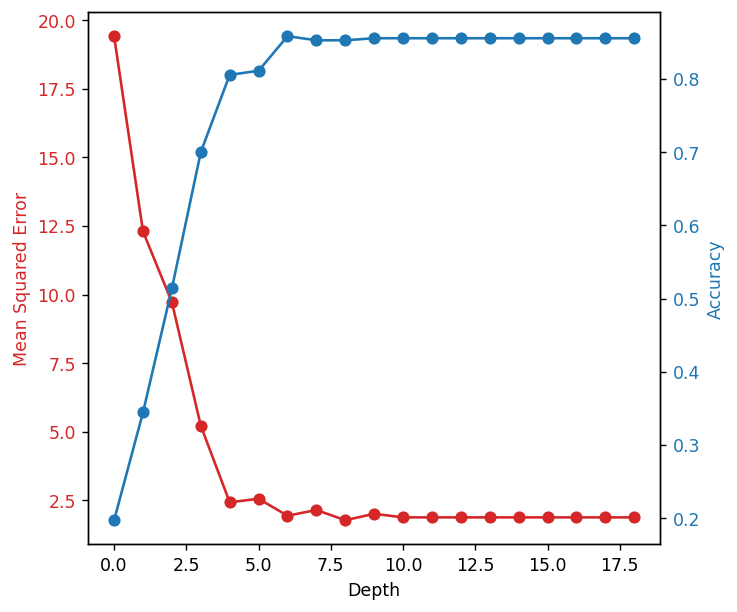

In [47]:
#plt.figure(figsize = (6, 5), dpi = 125)
fig, ax1 = plt.subplots(figsize = (6, 5), dpi = 125)
color = "tab:red"
ax1.set_xlabel("Depth")
ax1.set_ylabel("Mean Squared Error", color = color)
ax1.plot(loss, '-o', color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("Accuracy", color = color)
ax2.plot(accuracy, '-o', color = color)
ax2.tick_params(axis = 'y', labelcolor = color)
fig.tight_layout()
plt.show()

## Criterion (Gini)

<h4> Creating various models depending on the depth going from <i> (1 - 20) </i> and picking the best model depending on the accuracy and loss, with criteria of splitting fixed to <i><b> Gini.</b></i> </h4>

In [48]:
loss = []
accuracy = []
best_depth, best_model, best_accuracy = None, None, 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = depth, max_features = None)
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    if best_accuracy < accuracy_score(y_pred, y_val):
        best_depth = depth
        best_model = copy.deepcopy(model)
        best_accuracy = accuracy_score(y_pred, y_val)
        
    loss.append(mean_squared_error(y_pred, y_val))
    accuracy.append(accuracy_score(y_pred, y_val))

In [49]:
print(f"Depth = {best_depth}, Min Loss = {round(min(loss), 2)}, Max Accuracy = {round(max(accuracy), 2) * 100}%")

Depth = 14, Min Loss = 2.35, Max Accuracy = 88.0%


## Plot for Depth vs (Loss, Accuracy)

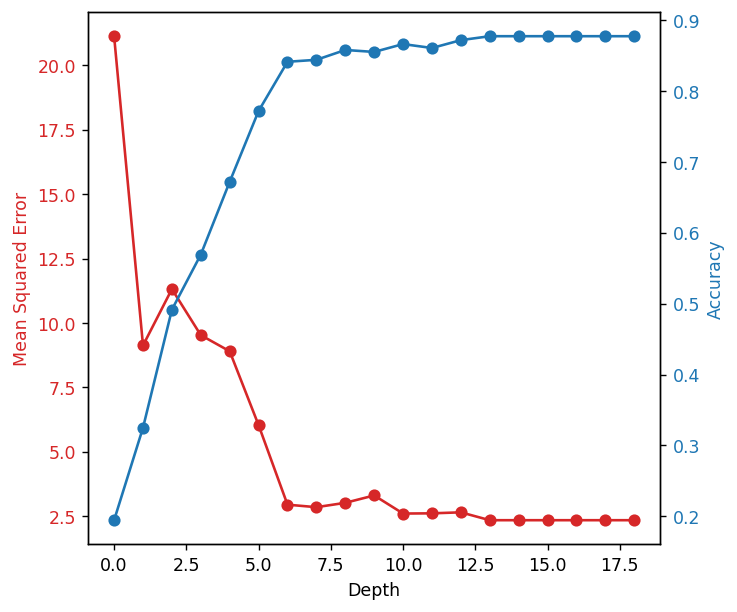

In [50]:
#plt.figure(figsize = (6, 5), dpi = 125)
fig, ax1 = plt.subplots(figsize = (6, 5), dpi = 125)
color = "tab:red"
ax1.set_xlabel("Depth")
ax1.set_ylabel("Mean Squared Error", color = color)
ax1.plot(loss, '-o', color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("Accuracy", color = color)
ax2.plot(accuracy, '-o', color = color)
ax2.tick_params(axis = 'y', labelcolor = color)
fig.tight_layout()
plt.show()

# Final Model

In [56]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 14, max_features = None)
model = model.fit(x_train, y_train)
y_pred_val = model.predict(x_val)
y_pred_train = model.predict(x_train)

## Accuracy Score

In [57]:
v_acc = accuracy_score(y_pred_val, y_val)
t_acc = accuracy_score(y_pred_train, y_train)

print(f"Train Accuracy = {t_acc * 100}%, Validaton Accuracy = {v_acc * 100}%")

Train Accuracy = 100.0%, Validaton Accuracy = 87.77777777777777%


## Precision

In [58]:
from sklearn.metrics import precision_score

v_pre = precision_score(y_pred_val, y_val, average = 'weighted')
t_pre = precision_score(y_pred_train, y_train, average = 'weighted')

print(f"Train [Precision] = {t_pre}, Validaton [Precision] = {v_pre}")

Train [Precision] = 1.0, Validaton [Precision] = 0.880396408313075


## Recall

In [59]:
from sklearn.metrics import recall_score

v_rec = recall_score(y_pred_val, y_val, average = 'weighted')
t_rec = recall_score(y_pred_train, y_train, average = 'weighted')

print(f"Train [Recall] = {t_rec}, Validaton [Recall] = {v_rec}")

Train [Recall] = 1.0, Validaton [Recall] = 0.8777777777777778


## F1-Score

In [60]:
from sklearn.metrics import f1_score

v_f = f1_score(y_pred_val, y_val, average = 'weighted')
t_f = f1_score(y_pred_train, y_train, average = 'weighted')

print(f"Train [F1 Score] = {t_f}, Validaton [F1 Score] = {v_f}")

Train [F1 Score] = 1.0, Validaton [F1 Score] = 0.8778872893727697
